# SC2001 Project 1 (Team 7)
## Integration of Mergesort & Insertion Sort

In Mergesort, when the sizes of subarrays are small, the overhead of many recursive calls makes the algorithm inefficient. Therefore, in real use, we often combine Mergesort with Insertion Sort to come up with a hybrid sorting algorithm for better efficiency. The idea is to set a small integer S as a threshold for the size of subarrays.

Once the size of a subarray in a recursive call of Mergesort is less than or equal to S, the algorithm will switch to Insertion Sort, which is efficient for small-sized input.

In [3]:
# Imports
import time
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setting seed to ensure consistency of data in the future
np.random.seed(22)

# a) Algorithm Implementation
Implementing the combination of insertion sort and merge sort.

In [5]:
# Create an Object to store the Number of Key Comparisons in our Sorting Methods
class KeyComparisons:
    def __init__(self):
        self.numKeyComparisons = 0

    def isALargerThanB(self, a, b) -> bool:
        self.numKeyComparisons += 1
        return a > b

    def isALessThanB(self, a, b) -> bool:
        self.numKeyComparisons += 1
        return a < b

    def isAEqualB(self, a, b) -> bool:
        self.numKeyComparisons += 1
        return a == b

    def incrementKeyComparisons(self, incrementValue):
        self.numKeyComparisons += incrementValue

    def resetKeyComparisons(self):
        self.numKeyComparisons = 0
        
    def returnKeyComparisons(self):
        return self.numKeyComparisons
        

# Declaring a Constant for Fixed Threshold Value
def FIXED_THRESHOLD_VALUE():
    return 10

## Insertion Sort
A simple sorting algorithm that builds a sorted array by repeatedly picking the next element and inserting it into its correct position among the previously sorted elements. It performs well on small or nearly sorted arrays but is inefficient for large datasets.

In [7]:
def insertion_sort(arr, comparisonsObject):
    
    # Traverse for each element from index 1 to end of list. First element can be ignored.
    for i in range(1, len(arr)):
        key = arr[i] # Pick out the element at the i-th position
        j = i-1 # j will be the running index for all the elements before elem
        
        # While it hasn't reached the first element and the key is smaller than 
        # the previous elements, we will shift the j-th element to the j+1-th position
        while j >= 0 and comparisonsObject.isALessThanB(key, arr[j]): 
            arr[j+1] = arr[j]
            j -= 1
        
        # If we reach an element that is smaller than the key 
        # or the start of the list (j=-1), we will insert the 
        # key to the right of that element or at index 0 if it reached start of list.
        arr[j+1] = key 
    return arr

## Merge Sort
A divide-and-conquer algorithm that recursively splits the array into smaller subarrays, sorts each half, and then merges them back together to form a sorted array. It has a time complexity of O(n log n) and is efficient for large datasets.


In [9]:
def merge_sort(arr, comparisonsObject, criterion):
    # Check if the array is of size 1 or less (base case)
    if len(arr) <= 1:
        return arr
    
    # Determine the midpoint to divide the array
    mid = len(arr) // 2
    
    # If the array size is greater than the given criterion, perform recursive sorting
    if len(arr) > criterion:
        # Recursively sort the first half
        left_half = merge_sort(arr[:mid], comparisonsObject, criterion)
        # Recursively sort the second half
        right_half = merge_sort(arr[mid:], comparisonsObject, criterion)
        
        # Merge the sorted halves together
        return merge(left_half, right_half, comparisonsObject)
    else:
        return arr


### Merge function

In [11]:
def merge(arr1, arr2, comparisonsObject):
    # Initialize indices for both arrays
    i, j = 0, 0
    
    # Initialize the merged sorted array
    sorted_arr = []
    
    # Compare elements from both arrays until one is exhausted
    while i < len(arr1) and j < len(arr2):
        # Track comparisons and merge elements accordingly
        if comparisonsObject.isALessThanB(arr1[i], arr2[j]):
            sorted_arr.append(arr1[i])
            i += 1
        elif comparisonsObject.isALessThanB(arr2[j], arr1[i]):
            sorted_arr.append(arr2[j])
            j += 1
        else:
            sorted_arr.append(arr1[i])
            sorted_arr.append(arr2[j])
            i += 1
            j += 1
    
    # Append any remaining elements from arr1
    while i < len(arr1):
        sorted_arr.append(arr1[i])
        i += 1
    
    # Append any remaining elements from arr2
    while j < len(arr2):
        sorted_arr.append(arr2[j])
        j += 1
    
    return sorted_arr


## Hybrid Sort
A combination of two or more sorting algorithms (like Insertion Sort and Merge Sort) that switches between algorithms based on the size or nature of the input. The goal is to leverage the strengths of each algorithm to optimize performance, typically using a faster algorithm for smaller subarrays.

In [13]:
def hybrid_sort(arr, S, comparisonsObject):
    # Base case: If the array has 1 or fewer elements, return it as is
    if len(arr) <= 1:
        return arr
    
    # If array size is greater than S, use Merge Sort
    if len(arr) > S:
        mid = len(arr) // 2
        
        # Recursively sort the first half
        left_half = hybrid_sort(arr[:mid], S, comparisonsObject)
        # Recursively sort the second half
        right_half = hybrid_sort(arr[mid:], S, comparisonsObject)
        
        # Merge the sorted halves
        return merge(left_half, right_half, comparisonsObject)
    
    # If array size is less than or equal to S, use Insertion Sort
    return insertion_sort(arr, comparisonsObject)


## Testing the algorithms:
Create a small array of random integers and get the sorting algorithm to sort it

In [15]:
arr = []
for i in range(20):
    arr.append(np.random.randint(-100,100))
comparisonsObject = KeyComparisons()   
print(arr)
print(hybrid_sort(arr,3, comparisonsObject))

[17, 32, -56, 92, 0, 2, -16, 36, 46, -86, -55, -7, 67, -66, 69, 27, -92, 68, 33, 11]
[-92, -86, -66, -56, -55, -16, -7, 0, 2, 11, 17, 27, 32, 33, 36, 46, 67, 68, 69, 92]


## b) Generating Input Arrays

Generate arrays of increasing sizes, in a range from 1,000 to 10 million. For each of the sizes, generate a random dataset of integers in the range of [1, …, x], where x is the largest number you allow for your datasets.


In [18]:
# Generate the required sizes of the arrays programatically from the range of 1,000 to 10 million.

inputDataSizes = []

for i in range(10):
    inputDataSizes.append((i+1) * 1000)
    inputDataSizes.append((i+1) * 10000)
    inputDataSizes.append((i+1) * 100000)
    inputDataSizes.append((i+1) * 1000000)

# Remove duplicates and sort the input data sizes
inputDataSizes = sorted(set(inputDataSizes))
print(inputDataSizes)

[1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000, 8000000, 9000000, 10000000]


In [19]:
# List of List of data
inputData = []

# Iterate through the data sizes array
for s in inputDataSizes:
    # For each datasize, we generate a random data array of size (s), each array will contain random integers from 1 to s.
    data = np.random.randint(1,s+1,size = s)
    inputData.append(data)
    
# Checking for the array of size 1000 that the generation was done correctly.    
for i in range(len(inputData)):
    print("Array Size: ", len(inputData[i]))
    print("Minimum No. of this array:" , min(inputData[i]))
    print("Maximum No .of this array:" , max(inputData[i]))
    print()

Array Size:  1000
Minimum No. of this array: 1
Maximum No .of this array: 1000

Array Size:  2000
Minimum No. of this array: 3
Maximum No .of this array: 2000

Array Size:  3000
Minimum No. of this array: 2
Maximum No .of this array: 2998

Array Size:  4000
Minimum No. of this array: 2
Maximum No .of this array: 4000

Array Size:  5000
Minimum No. of this array: 2
Maximum No .of this array: 5000

Array Size:  6000
Minimum No. of this array: 1
Maximum No .of this array: 6000

Array Size:  7000
Minimum No. of this array: 1
Maximum No .of this array: 7000

Array Size:  8000
Minimum No. of this array: 1
Maximum No .of this array: 8000

Array Size:  9000
Minimum No. of this array: 3
Maximum No .of this array: 8999

Array Size:  10000
Minimum No. of this array: 1
Maximum No .of this array: 10000

Array Size:  20000
Minimum No. of this array: 1
Maximum No .of this array: 20000

Array Size:  30000
Minimum No. of this array: 2
Maximum No .of this array: 29999

Array Size:  40000
Minimum No. of 

## c) Analyse Time Complexity: Run your program of the hybrid algorithm on the datasets generated in Step (b). Record the number of key comparisons performed in each case.

### Hybrid Sort Analysis

#### Overview:
The hybrid sort algorithm combines Insertion Sort and Merge Sort. It uses Insertion Sort for small subarrays (size ≤ \( s \)) and Merge Sort for larger arrays. This approach leverages the efficiency of Insertion Sort on small datasets and the scalability of Merge Sort on larger ones.

#### Time Complexity Breakdown:

1. **Insertion Sort Component**:
   - When the size of the input is divided into chunks of size \( s \), the number of chunks is \( n/s \).
   - The average and worst-case time complexity of Insertion Sort is \( O(s^2) \).
   - Therefore, the total time complexity for the Insertion Sort component is:
     \[
     \frac{n}{s} \times O(s^2) = O(ns)
     \]

   - In the best case, where the input is already sorted, the time complexity is:
     \[
     \frac{n}{s} \times O(s) = O(n)
     \]

2. **Merge Sort Component**:
   - The merging process operates on \( \log(n/s) \) levels, as the merging takes place at the depth of the recursion tree.
   - The time complexity for the Merge operation, which processes \( n \) elements at each level, is:
     \[
     n \times \log(n/s) = O(n \log(n/s))
     \]

3. **Total Time Complexity**:
   - **Average and Worst Case**:
     \[
     O(ns + n \log(n/s))
     \]
   - **Best Case**:
     \[
     O(n + n \log(n/s))
     \]

### Empirical Data Comparison:
- When \( s \) is fixed and relatively small, the time complexity can be simplified to:
  \[
  O(n + n \log n) = O(n \log n)
  \]
  This holds as long as \( s \) does not approach \( n \).

#### Expectations with \( s = 9 \):
- With \( s \) set to a small value (like 9), we anticipate the overall time complexity to remain around \( O(n \log n) \).

### Observations:
1. **Key Comparisons**:
   - The hybrid algorithm generally incurs more key comparisons than pure Merge Sort due to the \( O(n^2) \) nature of Insertion Sort. This is expected, as each insertion in a sorted subarray can require multiple comparisons.

2. **Elapsed Time**:
   - Despite the increased key comparisons, the hybrid algorithm often exhibits lower elapsed time compared to pure Merge Sort. This is due to the efficiency of Insertion Sort on smaller arrays, resulting in faster sorting times.

### Improvements and Suggestions:
1. **Plotting Key Comparisons**:
   - To visualize the performance, plot the number of key comparisons against different input sizes \( n \) while keeping \( s \) fixed. This will help in assessing the empirical data against the theoretical expectations.

2. **Further Empirical Analysis**:
   - Consider running multiple trials with varying values of \( s \) to see how it impacts the number of comparisons and elapsed time.
   - Analyze the results to confirm the predicted relationship between \( s \) and performance.

3. **Code Implementation**:
   - Ensure that the sorting implementation includes robust testing to compare performance across different array sizes and thresholds.

4. **Documentation**:
   - Enhance comments and documentation within the code to clarify the purpose of each component of the hybrid sort, especially regarding the thresholds and the rationale behind choosing Insertion Sort for small subarrays.



## Actual Implementation and Empirical Results

In [23]:
# Fix the Threshold Value S
thresholdValueS = FIXED_THRESHOLD_VALUE()

# Create Arrays to store X and Y Coordinates
fixedThresholdXCoordinates = []
fixedThresholdYCoordinates = []
fixedThresholdTimeCoordinates = []

# Run Hybrid Sort over each Individual Array
for array in inputData:
    copyOfArray = copy.deepcopy(array)
    arrayLength = len(copyOfArray)
    print("Current Array Size: {}".format(arrayLength))
    
    # Create Timestamps to track the time taken for the Hybrid Sort to sort this Array
    startTimestamp = time.time()
    hybrid_sort(copyOfArray, thresholdValueS, comparisonsObject)
    endingTimestamp = time.time()

    # Record the KeyComparisons (Y) and Different Threshold Values S(X)
    numKeyComparisons1 = comparisonsObject.returnKeyComparisons()
    fixedThresholdXCoordinates.append(arrayLength)
    fixedThresholdYCoordinates.append(numKeyComparisons1)
    fixedThresholdTimeCoordinates.append(endingTimestamp - startTimestamp)

    # Print Time Taken & Num Key Comparisons
    print("Time Elapsed for Hybrid Sort: {0:.4f} seconds".format(endingTimestamp - startTimestamp))
    print("Number of Key Comparisons: {}".format(numKeyComparisons1))
    print()
    # Reset the Number of Key Comparisons for Next Array
    comparisonsObject.resetKeyComparisons()



Current Array Size: 1000
Time Elapsed for Hybrid Sort: 0.0030 seconds
Number of Key Comparisons: 12231

Current Array Size: 2000
Time Elapsed for Hybrid Sort: 0.0072 seconds
Number of Key Comparisons: 27426

Current Array Size: 3000
Time Elapsed for Hybrid Sort: 0.0106 seconds
Number of Key Comparisons: 43434

Current Array Size: 4000
Time Elapsed for Hybrid Sort: 0.0140 seconds
Number of Key Comparisons: 60643

Current Array Size: 5000
Time Elapsed for Hybrid Sort: 0.0190 seconds
Number of Key Comparisons: 78757

Current Array Size: 6000
Time Elapsed for Hybrid Sort: 0.0250 seconds
Number of Key Comparisons: 96178

Current Array Size: 7000
Time Elapsed for Hybrid Sort: 0.0260 seconds
Number of Key Comparisons: 114336

Current Array Size: 8000
Time Elapsed for Hybrid Sort: 0.0305 seconds
Number of Key Comparisons: 133306

Current Array Size: 9000
Time Elapsed for Hybrid Sort: 0.0360 seconds
Number of Key Comparisons: 152736

Current Array Size: 10000
Time Elapsed for Hybrid Sort: 0.040

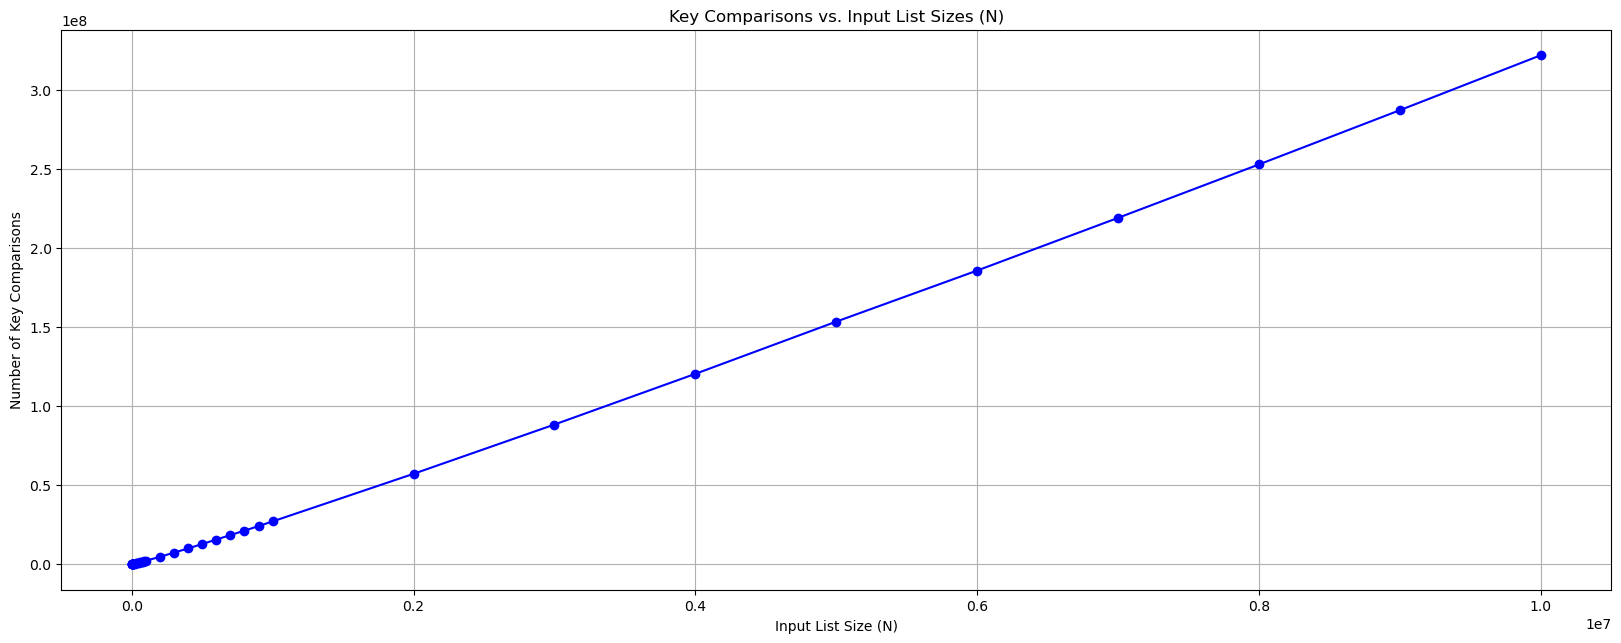

In [24]:
import matplotlib.pyplot as plt

# Create a figure for the plot
plt.figure(figsize=(20, 16))

# Create a subplot for the graph
ax = plt.subplot(211)

# Plot the number of key comparisons against input list sizes
ax.plot(fixedThresholdXCoordinates, fixedThresholdYCoordinates, marker='o', linestyle='-', color='b')

# Set labels and title
ax.set_xlabel("Input List Size (N)")
ax.set_ylabel("Number of Key Comparisons")
ax.set_title("Key Comparisons vs. Input List Sizes (N)")

# Optional: Display grid for better readability
ax.grid()

# Show the plot
plt.show()


## Analysis of Key Comparisons vs. Threshold Size

The plot of the number of key comparisons against the threshold size ***S*** exhibits a staircase pattern. This behavior can be understood as follows:

Consider an array of size **n**, with the threshold set to **s=n/k**​. The binary tree structure of the merge sort method illustrates the top-down approach of the algorithm.

When the merge sort splits the array into **k** subarrays, each of size **n/k​**, the Insertion Sort algorithm is invoked only for subarrays where the size is <= **s** .

Now, if we adjust the threshold **s** such that ***2n/k<s<n/k***​, the merge sort will handle subarrays of size **2n/k**​ and will not invoke Insertion Sort until reaching subarrays of size **n/k**.

If we further modify **s** to be exactly **2n/k**, the Insertion Sort will be applied at this size level instead, leading to an increase in key comparisons.

This illustrates that whenever **s** lies strictly between the sizes of two adjacent levels in the binary tree structure, the number of times Insertion Sort is invoked remains constant, resulting in the same number of key comparisons.

Thus, the staircase pattern observed in the plot corresponds to these "level regions" where ***2n/k<s<n/k*** results in stable key comparison counts, while spikes occur when ss is exactly equal to **2n/k**​ or **n/k**.

## Empirical Results

The empirical findings support this theoretical analysis, showing that the number of key comparisons fluctuates in accordance with the defined threshold SS and its relationship to the sizes of the subarrays handled by the hybrid sort algorithm.

In [26]:
import copy
import time

def determine_optimal_threshold(initial_threshold, selected_array, potential_threshold_values, potential_threshold_times, x_coordinates, y_coordinates, input_data):
    # List to store elapsed time for each threshold value
    elapsed_times = []

    # Number of threshold values to test
    num_threshold_values = len(inputData)
    threshold_value_s = initial_threshold

    for i in range(num_threshold_values):
        # Create a deep copy of the selected array
        copied_array = copy.deepcopy(selected_array)
        # Increment the threshold value
        threshold_value_s += 5
        print(f"Current Threshold Value: {threshold_value_s}")

        # Measure the time taken for Hybrid Sort
        start_time = time.time()
        hybrid_sort(copied_array, threshold_value_s, comparisonsObject)
        end_time = time.time()

        # Record key comparisons and threshold values
        num_key_comparisons = comparisonsObject.returnKeyComparisons()
        x_coordinates.append(threshold_value_s)
        y_coordinates.append(num_key_comparisons)

        # Record elapsed time
        elapsed_time = end_time - start_time
        elapsed_times.append(elapsed_time)
        print(f"Time Elapsed: {elapsed_time:.4f} seconds")
        print(f"Number of Key Comparisons: {num_key_comparisons}")
        comparisonsObject.resetKeyComparisons()

    # Determine the optimal threshold based on minimum elapsed time
    min_elapsed_time = min(elapsed_times)
    index_of_optimal_threshold = elapsed_times.index(min_elapsed_time)
    optimal_threshold = initial_threshold + (index_of_optimal_threshold + 1) * 5  # Increment by 5

    # Store and print optimal results
    potential_threshold_times.append(min_elapsed_time)
    potential_threshold_values.append(optimal_threshold)
    print(f"Optimal Threshold: {optimal_threshold}")
    print(f"Time Taken for Optimal Threshold: {min_elapsed_time:.4f}\n")

# Choose an array to fix the array size
selected_array = inputData[4]
print(f"This is Array Length: {len(selected_array)}")

# Arrays to store potential optimal threshold values and their corresponding minimum times
potential_threshold_values = []
potential_threshold_times = []

# Create arrays to store X and Y coordinates
fixed_array_size_x_coordinates = []
fixed_array_size_y_coordinates = []

determine_optimal_threshold(0, selected_array, potential_threshold_values, potential_threshold_times, fixed_array_size_x_coordinates, fixed_array_size_y_coordinates, inputData)


This is Array Length: 5000
Current Threshold Value: 5
Time Elapsed: 0.0115 seconds
Number of Key Comparisons: 78152
Current Threshold Value: 10
Time Elapsed: 0.0282 seconds
Number of Key Comparisons: 78757
Current Threshold Value: 15
Time Elapsed: 0.0191 seconds
Number of Key Comparisons: 78757
Current Threshold Value: 20
Time Elapsed: 0.0156 seconds
Number of Key Comparisons: 84743
Current Threshold Value: 25
Time Elapsed: 0.0156 seconds
Number of Key Comparisons: 84743
Current Threshold Value: 30
Time Elapsed: 0.0313 seconds
Number of Key Comparisons: 84743
Current Threshold Value: 35
Time Elapsed: 0.0186 seconds
Number of Key Comparisons: 84743
Current Threshold Value: 40
Time Elapsed: 0.0286 seconds
Number of Key Comparisons: 102434
Current Threshold Value: 45
Time Elapsed: 0.0156 seconds
Number of Key Comparisons: 102434
Current Threshold Value: 50
Time Elapsed: 0.0313 seconds
Number of Key Comparisons: 102434
Current Threshold Value: 55
Time Elapsed: 0.0316 seconds
Number of Key 

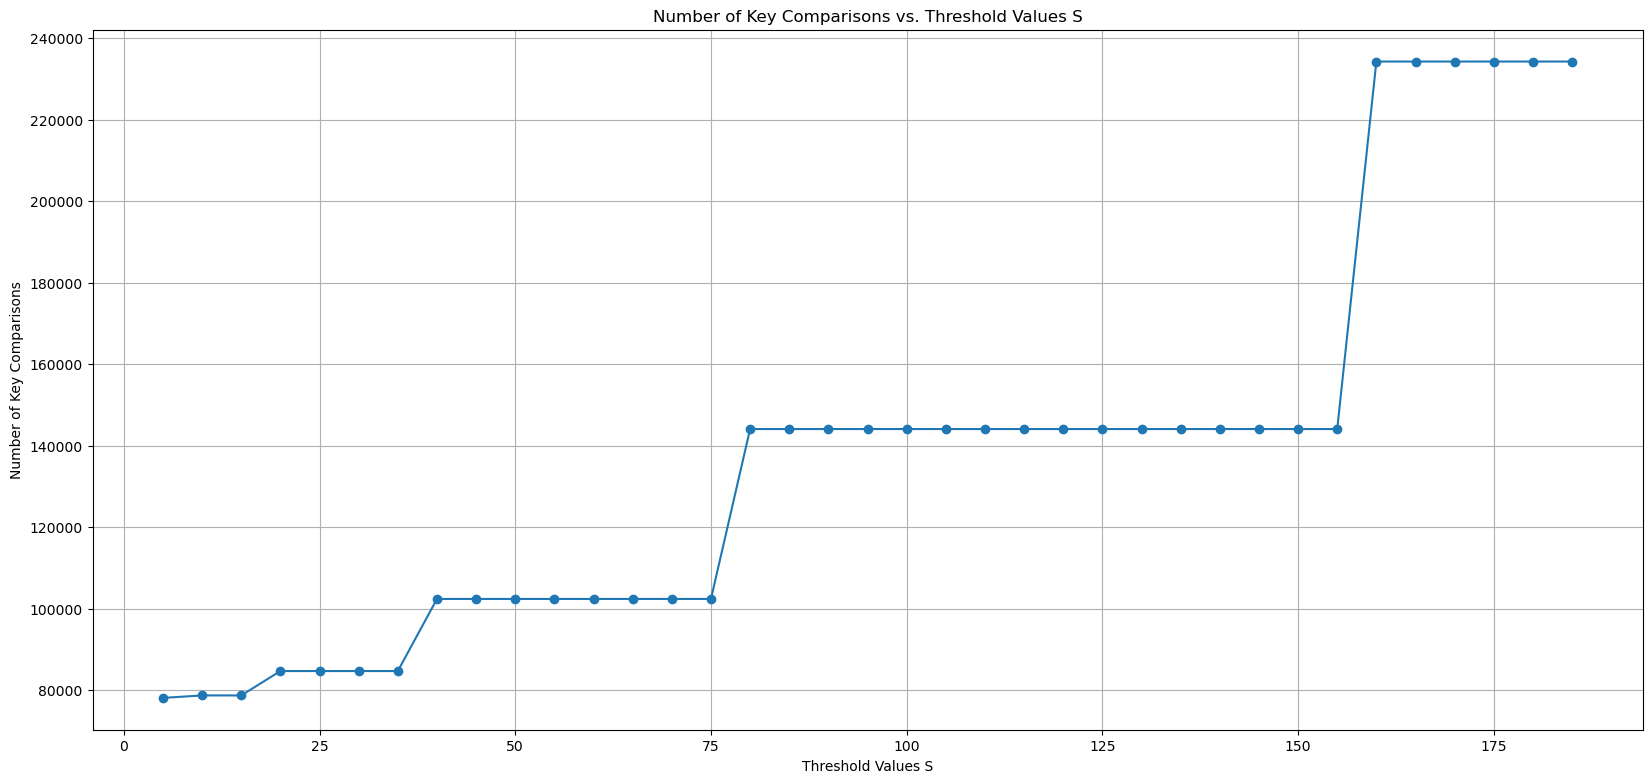

In [27]:
import matplotlib.pyplot as plt

# Plot the graph using Matplotlib
plt.figure(figsize=(20, 20))
ax = plt.subplot(211)
ax.plot(fixed_array_size_x_coordinates, fixed_array_size_y_coordinates, marker='o')  # Added markers for clarity

# Naming the axes
ax.set_xlabel("Threshold Values S")
ax.set_ylabel("Number of Key Comparisons")
ax.set_title("Number of Key Comparisons vs. Threshold Values S")

# Show the plot
plt.grid(True)  # Optional: adds a grid for better readability
plt.show()


Optimal S is: 10


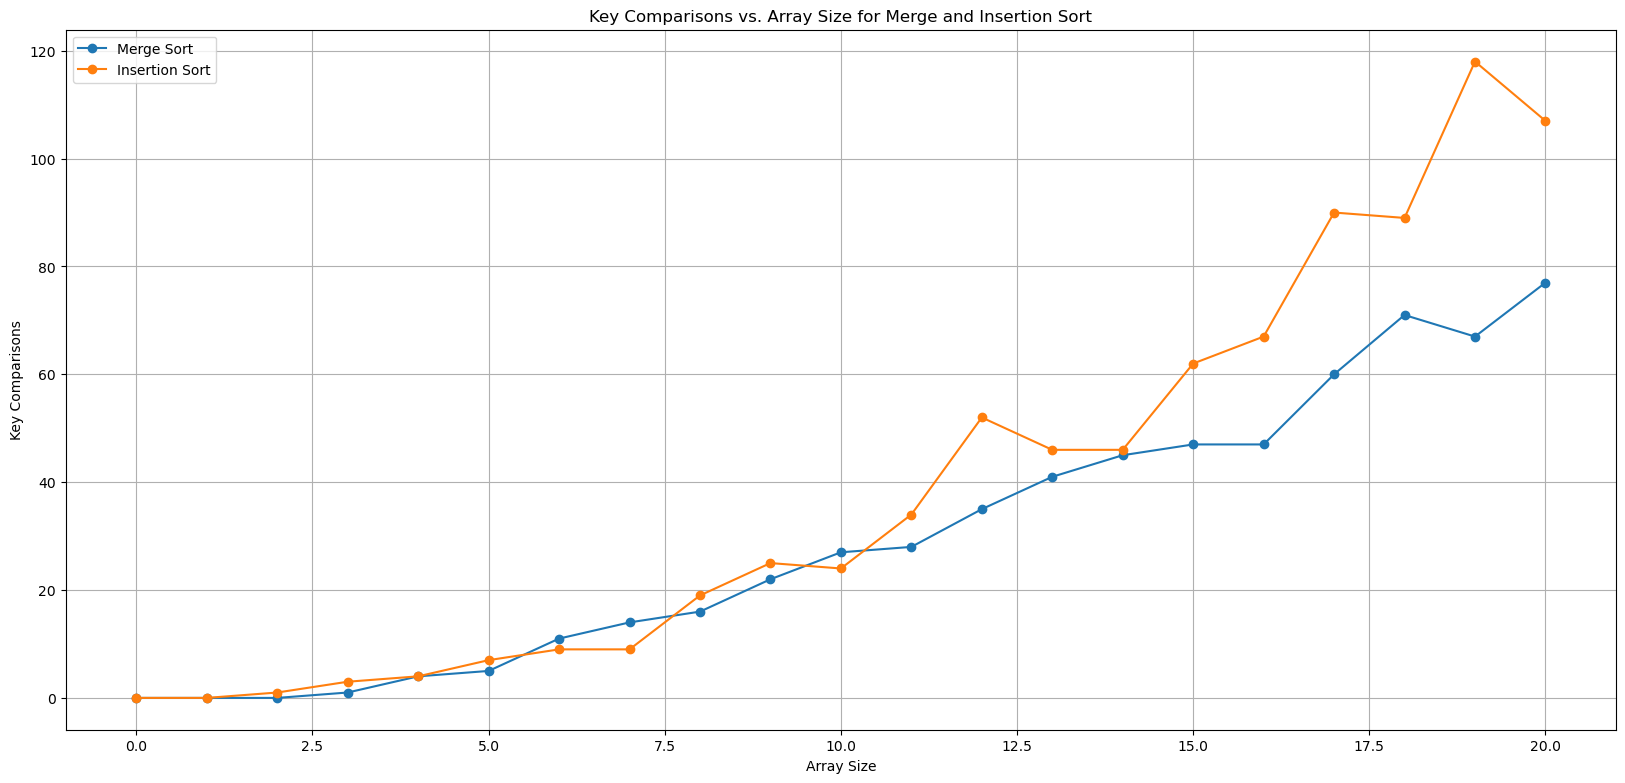

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize variables for determining Optimal S
optimal_s = 0
array_sizes = range(0, 21)  # Updated range to include size 20
merge_comparisons = []
insertion_comparisons = []

# Objects to track the number of key comparisons
merge_object = KeyComparisons()
insert_object = KeyComparisons()

# Iterate through different sizes of input datasets up to size 20
for s in array_sizes:
    # Create a random array of size s
    arr = np.random.randint(10000, size=s)
    arr2 = arr.copy()  # Copy for Insertion Sort

    # Perform Merge Sort
    merge_sort(arr, merge_object, 2)
    merge_comparison = merge_object.returnKeyComparisons()
    merge_object.resetKeyComparisons()

    # Perform Insertion Sort
    insertion_sort(arr2, insert_object)
    insertion_comparison = insert_object.returnKeyComparisons()
    insert_object.resetKeyComparisons()

    # Determine the optimal threshold S
    if insertion_comparison < merge_comparison:
        optimal_s = s

    # Store key comparisons for plotting
    merge_comparisons.append(merge_comparison)
    insertion_comparisons.append(insertion_comparison)

# Setup for Graph Plotting
plt.figure(figsize=(20, 20))
ax = plt.subplot(211)
# Actual Plots
ax.plot(array_sizes, merge_comparisons, label="Merge Sort", marker='o')
ax.plot(array_sizes, insertion_comparisons, label="Insertion Sort", marker='o')

# Graph Labels
ax.set_xlabel("Array Size")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons vs. Array Size for Merge and Insertion Sort")
ax.legend()
ax.grid(True)  # Optional: adds a grid for better readability

# Print the Optimal S value
print('Optimal S is:', optimal_s)

# Show the plot
plt.show()


In [53]:
def mergeSort(arr, comparisonsObject, criterion):
    # Use the middle element to divide the array into two halves
    m = len(arr)//2

    # Base case. Array has 1 element.
    if len(arr) <= 1:
        return arr
    
    # Recursive step
    if len(arr) > criterion:
        # Sort first half recursively
        arr[:m] = mergeSort(arr[:m], comparisonsObject, criterion)
        # Sort second half recursively
        arr[m:] = mergeSort(arr[m:], comparisonsObject, criterion)
    arr = merge(arr[:m], arr[m:], comparisonsObject)
    
    return arr

# Initial Initialisation
targetArray = copy.deepcopy(inputData[36])
compareMergeAndHybrid = KeyComparisons()

# Determine Merge Sort CPU Times & Key Comparisons
mergeSortStartTime = time.time()
mergeSort(targetArray, compareMergeAndHybrid, 2)    # Don't think Optimal Threshold applies to MergeSort as well
mergeSortEndTime = time.time()

mergeSortTimeTaken = mergeSortEndTime - mergeSortStartTime
print("Merge Sort CPU Times: {0:.2f} seconds".format(mergeSortTimeTaken))
print("Number of Key Comparisons for Merge Sort: {}".format(compareMergeAndHybrid.returnKeyComparisons()))

# Reinitialise Arrays and Objects
targetArray = copy.deepcopy(inputData[36])
compareMergeAndHybrid.resetKeyComparisons()

# Determine the Same for Hybrid Sort
hybridSortStartTime = time.time()
hybrid_sort(targetArray, 9, compareMergeAndHybrid)
hybridSortEndTime = time.time()

hybridSortTimeTaken = hybridSortEndTime - hybridSortStartTime
print("Hybrid Sort CPU Times: {0:.2f} seconds".format(hybridSortTimeTaken))
print("Number of Key Comparisons for Hybrid Sort: {}".format(compareMergeAndHybrid.returnKeyComparisons()))


Merge Sort CPU Times: 117.23 seconds
Number of Key Comparisons for Merge Sort: 327473859
Hybrid Sort CPU Times: 74.63 seconds
Number of Key Comparisons for Hybrid Sort: 321003121
